# **Домашнее задание по теме «Оценка точности модели, переобучение, регуляризация»**

Полученные графики и метрики говорят о том, что наша модель довольно хорошо предстказывет данные - ROC кривая проходит недалеко от верхнего левого угла, TPR = 0.837, что говорит о том, что модель хорошо предсказывает данные, при это FPR = 0,17 , на мой взгляд, уровень ложноположительных прогнозов довольно высок и модель может быть улучшена.
В нашем случае ROC-кривая не проходит ниже диагонали, но если бы проходила, то это значит, что нам нудно просто инверитровать прогнозы модели (потому что она предсказывет ровно наоборот)

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [81]:
from google.colab import files
uploaded = files.upload()

Saving athletes.csv to athletes (1).csv


In [82]:
data = pd.read_csv('athletes.csv')

In [83]:
data.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [84]:
#data['prize'] = data[['gold', 'silver']].apply(lambda x: 0 if (x['gold'] == 0) or (x['silver'] == 0) else 1, axis=1) 

In [85]:
#data['gold'] = data['gold'].apply(lambda x: 0 if x == 0 else 1) 

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [87]:
data['height'] = data['height'].fillna(data['height'].mean())

In [88]:
data['weight'] = data['weight'].fillna(data['weight'].mean())

In [89]:
data['dob'] = data['dob'].fillna('6/17/80')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11538 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [91]:
data['nationality'] = LabelEncoder().fit_transform(data['nationality'])

In [92]:
data.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,59,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,102,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,33,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,119,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,141,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,10,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,198,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,10,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,59,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,61,female,7/22/91,1.65,54.0,athletics,0,0,0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  int64  
 3   sex          11538 non-null  object 
 4   dob          11538 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 991.7+ KB


In [94]:
selectedColumns = data [['nationality', 'sex', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']]

In [95]:
X = pd.get_dummies( selectedColumns, columns = ['nationality', 'sport'])

In [96]:
X

,sex,height,weight,gold,silver,bronze,nationality_0,nationality_1,nationality_2,nationality_3,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,male,1.72,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,female,1.68,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,1.98,79.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,1.83,80.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,male,1.81,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,female,1.64,58.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,female,1.73,63.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,male,1.85,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,male,1.60,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
del X['sex']
X.head()

,height,weight,gold,silver,bronze,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [99]:
le.fit(data['sex'])

LabelEncoder()

In [100]:
le.classes_

array(['female', 'male'], dtype=object)

In [101]:
# записываем в переменную y преобразованный столбец sex

y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

 Логистическая регрессия

In [102]:
model = LogisticRegression(max_iter=10000)

Делим выборку в соотношении 80/20

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучаем модель

In [104]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Получаем прогнозные значения модели

In [105]:
predictions = model.predict_proba(X_test)

In [106]:
predictions[:2]

array([[0.4227181 , 0.5772819 ],
       [0.00908792, 0.99091208]])

In [107]:
model.score(X_train, y_train)

0.8398699891657638

In [108]:
model.score(X_test, y_test)

0.8297227036395147

**Оценка качества модели**

**3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.**

In [109]:
from sklearn.metrics import roc_curve

In [110]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [111]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9999975561043648)
(0.0, 0.000774593338497289, 0.9999975561043649)
(0.0, 0.008520526723470178, 0.9996261353359813)
(0.0009832841691248771, 0.008520526723470178, 0.9996126385113406)
(0.0009832841691248771, 0.015491866769945779, 0.9990978618272875)
(0.0019665683382497543, 0.015491866769945779, 0.9990873075319632)
(0.0019665683382497543, 0.030209140201394268, 0.9964698767672328)
(0.0029498525073746312, 0.030209140201394268, 0.996447145902507)
(0.0029498525073746312, 0.061967467079783116, 0.9913512044602981)
(0.003933136676499509, 0.061967467079783116, 0.9911828551116966)


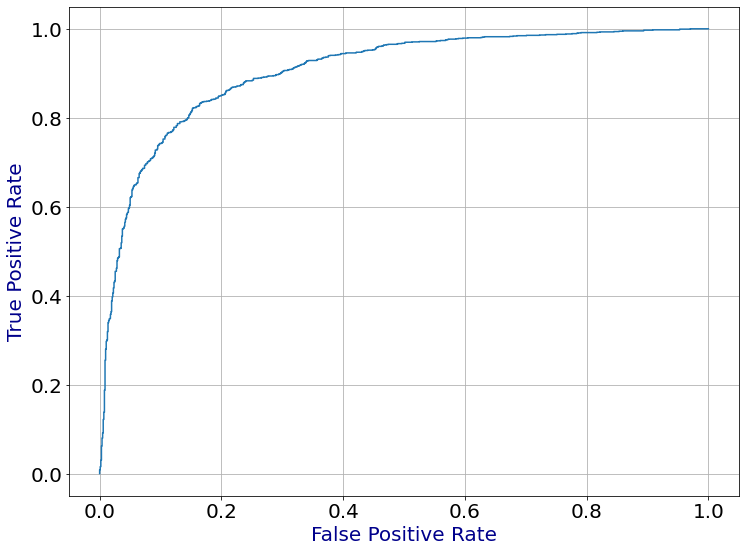

In [112]:
plt.figure(figsize=(12,9))
plt.tick_params(axis='both', labelsize=20)
plt.xlabel('False Positive Rate', fontsize=20, color='darkblue')
plt.ylabel('True Positive Rate', fontsize=20, color='darkblue')
plt.plot( fpr, tpr )
plt.grid()

**4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [113]:
from sklearn.metrics import roc_auc_score

In [114]:
roc_auc_score( y_test, predictions[:, 1] )

0.9045441285901107

**5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.**

In [115]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [116]:
predictions = model.predict_proba( X_test )
predictions[:3]

array([[0.4227181 , 0.5772819 ],
       [0.00908792, 0.99091208],
       [0.82460881, 0.17539119]])

In [117]:
tp, fp, tn, fn

(1081, 183, 834, 210)

True Positive Rate

In [118]:
tpr = tp/(tp + fn)
tpr

0.8373353989155693

False Positive Rate

In [119]:
fpr = fp/(fp + tn)
fpr

0.17994100294985252

**6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один.**

In [120]:
import numpy as np
from numpy import arange

In [121]:
predictions = model.predict_proba( X_test )

In [122]:
tpr_list = [] 
fpr_list = []

for i in np.sort(predictions[:, 1]):
  tp = 0 # True positive
  fp = 0 # False positive
  fn = 0 # False negative
  tn = 0 # True negative
  #predictions = model.predict_proba( X_test )
  for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
      if predicted_prob >= i:
          predicted = 1
      else:
          predicted = 0
      
      if predicted == 1:
          if actual == 1:
              tp += 1
          else:
              fp += 1
      
      else:
          if actual == 1:
              fn += 1
          else:
              tn += 1
  tpr = tp/(tp + fn)
  fpr = fp / (fp + tn)
  tpr_list.append(tpr) 
  fpr_list.append(fpr) 
  print(tp, fp, tn, fn)
             
  

1291 1017 0 0
1291 1016 1 0
1291 1015 2 0
1291 1014 3 0
1291 1013 4 0
1291 1012 5 0
1291 1011 6 0
1291 1010 7 0
1291 1009 8 0
1291 1008 9 0
1291 1007 10 0
1291 1006 11 0
1291 1005 12 0
1291 1004 13 0
1291 1003 14 0
1291 1002 15 0
1291 1001 16 0
1291 1000 17 0
1291 999 18 0
1291 998 19 0
1291 997 20 0
1291 996 21 0
1291 995 22 0
1291 994 23 0
1291 993 24 0
1291 992 25 0
1291 991 26 0
1291 990 27 0
1291 989 28 0
1291 988 29 0
1291 987 30 0
1290 987 30 1
1290 986 31 1
1290 985 32 1
1290 984 33 1
1290 983 34 1
1290 982 35 1
1290 981 36 1
1290 980 37 1
1290 979 38 1
1290 978 39 1
1290 977 40 1
1290 976 41 1
1290 975 42 1
1290 974 43 1
1290 973 44 1
1290 972 45 1
1290 971 46 1
1290 970 47 1
1290 969 48 1
1289 969 48 2
1288 969 48 3
1288 968 49 3
1288 967 50 3
1288 966 51 3
1288 965 52 3
1288 964 53 3
1288 963 54 3
1288 962 55 3
1288 961 56 3
1288 960 57 3
1288 959 58 3
1288 958 59 3
1288 957 60 3
1288 956 61 3
1288 955 62 3
1288 954 63 3
1288 953 64 3
1288 952 65 3
1288 951 66 3
1288 950 67 

In [123]:
tpr_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9984508133230054,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845

In [124]:
fpr_list

[1.0,
 0.9990167158308751,
 0.9980334316617503,
 0.9970501474926253,
 0.9960668633235005,
 0.9950835791543756,
 0.9941002949852508,
 0.9931170108161259,
 0.992133726647001,
 0.9911504424778761,
 0.9901671583087512,
 0.9891838741396264,
 0.9882005899705014,
 0.9872173058013766,
 0.9862340216322517,
 0.9852507374631269,
 0.984267453294002,
 0.983284169124877,
 0.9823008849557522,
 0.9813176007866273,
 0.9803343166175025,
 0.9793510324483776,
 0.9783677482792527,
 0.9773844641101278,
 0.976401179941003,
 0.9754178957718781,
 0.9744346116027532,
 0.9734513274336283,
 0.9724680432645034,
 0.9714847590953786,
 0.9705014749262537,
 0.9705014749262537,
 0.9695181907571289,
 0.9685349065880039,
 0.967551622418879,
 0.9665683382497542,
 0.9655850540806293,
 0.9646017699115044,
 0.9636184857423795,
 0.9626352015732547,
 0.9616519174041298,
 0.960668633235005,
 0.95968534906588,
 0.9587020648967551,
 0.9577187807276303,
 0.9567354965585054,
 0.9557522123893806,
 0.9547689282202556,
 0.953785644051

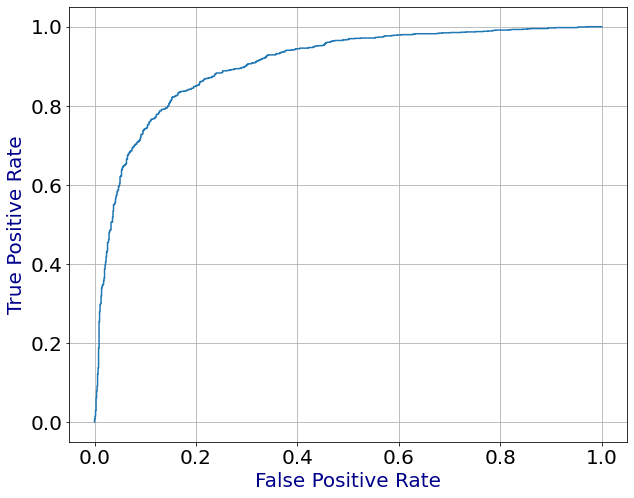

In [125]:
plt.figure(figsize=(10,8))
plt.plot( fpr_list, tpr_list )
plt.tick_params(axis='both', labelsize=20)
plt.xlabel('False Positive Rate', fontsize=20, color='darkblue')
plt.ylabel('True Positive Rate', fontsize=20, color='darkblue')
plt.grid()

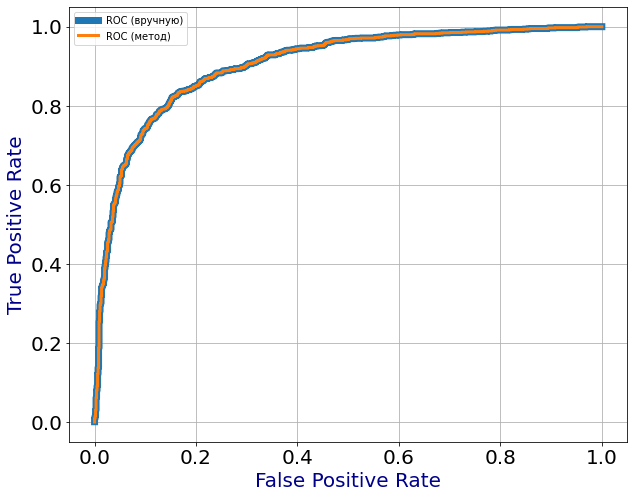

In [126]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
plt.figure(figsize=(10,8))
plt.plot(fpr_list, tpr_list, linewidth=7 )
plt.plot( fpr, tpr, linewidth=3 )
plt.tick_params(axis='both', labelsize=20)
plt.xlabel('False Positive Rate', fontsize=20, color='darkblue')
plt.ylabel('True Positive Rate', fontsize=20, color='darkblue')
plt.grid()
plt.legend (('ROC (вручную)', 'ROC (метод)'))

**Precision Recall**

In [127]:
pr = tp/(tp+fp)
pr

1.0

In [128]:
re = tp/(tp+fn)
re

0.000774593338497289

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

In [131]:
pr.shape, thres.shape

((2256,), (2255,))

In [132]:
for line in zip ( pr[:10], re[:10], thres[:10]):
  print(line)

(0.5667251975417033, 1.0, 0.017546878938806264)
(0.5665349143610013, 0.9992254066615027, 0.018245680756697028)
(0.5667838312829525, 0.9992254066615027, 0.018622414254057505)
(0.567032967032967, 0.9992254066615027, 0.01875735808304273)
(0.5672823218997362, 0.9992254066615027, 0.019266433871856153)
(0.5675318961724594, 0.9992254066615027, 0.019370599945531232)
(0.5677816901408451, 0.9992254066615027, 0.019634980396861162)
(0.5680317040951123, 0.9992254066615027, 0.020431470480203256)
(0.5682819383259912, 0.9992254066615027, 0.0205137641292414)
(0.5685323931247246, 0.9992254066615027, 0.020623289750013284)


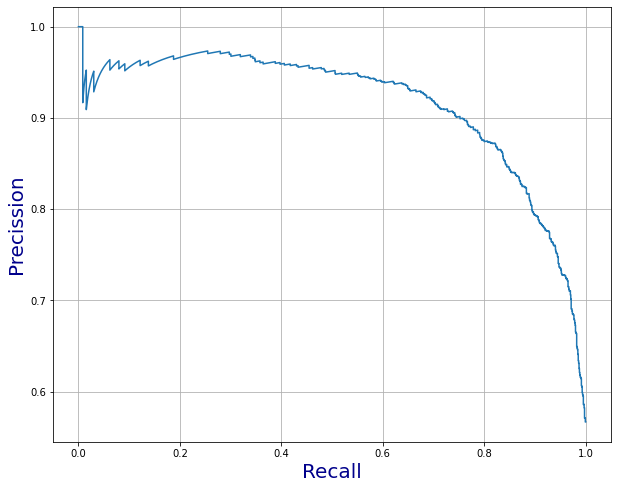

In [133]:
plt.figure(figsize=(10,8))
plt.xlabel('Recall', fontsize=20, color='darkblue')
plt.ylabel('Precission', fontsize=20, color='darkblue')
plt.plot(re, pr)
plt.grid()

**7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.**

In [134]:
prs_list = [] 
rcl_list = []

for i in np.sort(predictions[:, 1]):
  tp = 0 # True positive
  fp = 0 # False positive
  fn = 0 # False negative
  tn = 0 # True negative
  #predictions = model.predict_proba( X_test )
  for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
      if predicted_prob >= i:
          predicted = 1
      else:
          predicted = 0
      
      if predicted == 1:
          if actual == 1:
              tp += 1
          else:
              fp += 1
      
      else:
          if actual == 1:
              fn += 1
          else:
              tn += 1
  prs = tp/(tp + fp) #precission
  rcl = tp / (tp + fn) #recall
  prs_list.append(prs) 
  rcl_list.append(rcl) 
  print(tp, fp, tn, fn)

1291 1017 0 0
1291 1016 1 0
1291 1015 2 0
1291 1014 3 0
1291 1013 4 0
1291 1012 5 0
1291 1011 6 0
1291 1010 7 0
1291 1009 8 0
1291 1008 9 0
1291 1007 10 0
1291 1006 11 0
1291 1005 12 0
1291 1004 13 0
1291 1003 14 0
1291 1002 15 0
1291 1001 16 0
1291 1000 17 0
1291 999 18 0
1291 998 19 0
1291 997 20 0
1291 996 21 0
1291 995 22 0
1291 994 23 0
1291 993 24 0
1291 992 25 0
1291 991 26 0
1291 990 27 0
1291 989 28 0
1291 988 29 0
1291 987 30 0
1290 987 30 1
1290 986 31 1
1290 985 32 1
1290 984 33 1
1290 983 34 1
1290 982 35 1
1290 981 36 1
1290 980 37 1
1290 979 38 1
1290 978 39 1
1290 977 40 1
1290 976 41 1
1290 975 42 1
1290 974 43 1
1290 973 44 1
1290 972 45 1
1290 971 46 1
1290 970 47 1
1290 969 48 1
1289 969 48 2
1288 969 48 3
1288 968 49 3
1288 967 50 3
1288 966 51 3
1288 965 52 3
1288 964 53 3
1288 963 54 3
1288 962 55 3
1288 961 56 3
1288 960 57 3
1288 959 58 3
1288 958 59 3
1288 957 60 3
1288 956 61 3
1288 955 62 3
1288 954 63 3
1288 953 64 3
1288 952 65 3
1288 951 66 3
1288 950 67 

In [135]:
prs_list

[0.5593587521663779,
 0.5596012136974425,
 0.5598438855160451,
 0.5600867678958785,
 0.5603298611111112,
 0.5605731654363874,
 0.5608166811468288,
 0.5610604085180356,
 0.561304347826087,
 0.5615484993475424,
 0.561792863359443,
 0.5620374401393121,
 0.5622822299651568,
 0.5625272331154684,
 0.562772449869224,
 0.5630178805058875,
 0.5632635253054101,
 0.5635093845482322,
 0.5637554585152839,
 0.564001747487986,
 0.5642482517482518,
 0.564494971578487,
 0.5647419072615923,
 0.5649890590809628,
 0.5652364273204904,
 0.5654840122645641,
 0.5657318141980718,
 0.5659798334064007,
 0.5662280701754386,
 0.5664765247915753,
 0.5667251975417033,
 0.5665349143610013,
 0.5667838312829525,
 0.567032967032967,
 0.5672823218997362,
 0.5675318961724594,
 0.5677816901408451,
 0.5680317040951123,
 0.5682819383259912,
 0.5685323931247246,
 0.5687830687830688,
 0.5690339655932951,
 0.5692850838481907,
 0.5695364238410596,
 0.5697879858657244,
 0.5700397702165267,
 0.5702917771883289,
 0.5705440070765149

In [136]:
rcl_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9992254066615027,
 0.9984508133230054,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845082,
 0.9976762199845

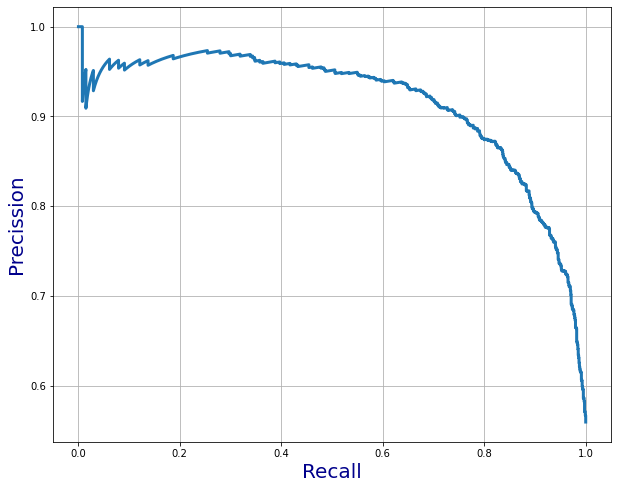

In [137]:
plt.figure(figsize=(10,8))
plt.plot(rcl_list, prs_list, linewidth=3 )
plt.xlabel('Recall', fontsize=20, color='darkblue')
plt.ylabel('Precission', fontsize=20, color='darkblue')
plt.grid()